In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats.stats as stats

# Data Understanding

![](https://drive.google.com/uc?id=1OTFC1Gefq2MbliHC8vVEON-6PkO8EQoF)

msisdn 					: nomor sim card <br>
flag_taker				: keterangan taker ( 1 = taker, 0 = non taker)<br>
LoS						: Length of Stay atau umur simcard (hari)<br>
first_rank_category		: Apps dominan yang dipakai (peringkat 1)<br>
mytsel_app_user			: keterangan sebagai pengguna MyTelkomsel (1 = user MyTelkomsel, 0 = non pengguna MyTelkomsel)<br>
total_revenue			: revenue keseluruhan dari semua layanan pada simcard tersebut selama sebulan (rupiah)<br>
rev_voice				: revenue voice dari simcard tersebut selama sebulan (rupiah)<br>
rev_sms					: revenue sms dari simcard tersebut selama sebulan (rupiah)<br>
rev_broadband			: revenue data dari simcard tersebut selama sebulan (rupiah)<br>
rev_voice_pack			: revenue khusus paket voice dari simcard tersebut selama sebulan (rupiah)<br>
rev_sms_pack			: revenue khusus paket sms dari simcard tersebut selama sebulan (rupiah)<br>
rev_data_pack			: revenue khusus paket data dari simcard tersebut selama sebulan (rupiah)<br>
rev_pack_mytsel			: revenue paket, pembelian dari MyTelkomsel (rupiah)<br>
rev_voice_pack_mytsel 	: revenue paket voice, pembelian dari MyTelkomsel (rupiah)<br>
rev_sms_pack_mytsel 	: revenue paket sms, pembelian dari MyTelkomsel (rupiah)<br>
rev_data_pack_mytsel 	: revenue paket data, pembelian dari MyTelkomsel (rupiah)<br>
trx_voice 				: jumlah transaksi panggilan<br>
trx_voice_onnet 		: jumlah transaksi panggilan onnet - ke sesama operator<br>
trx_voice_offnet 		: jumlah transaksi panggilan offnet - ke luar operator<br>
mou_voice 				: durasi penggunaan layanan voice (detik)<br>
mou_voice_onnet 		: durasi penggunaan layanan voice onnet - ke sesama operator (detik)<br>
mou_voice_offnet 		: durasi penggunaan layanan voice offnet - ke luar operator (detik)<br>
trx_sms 				: jumlah transaksi sms<br>
trx_sms_onnet 			: jumlah transaksi sms onnet - ke sesama operator <br>
trx_sms_offnet 			: jumlah transaksi sms offnet - ke luar operator<br> 
payload 				: quota penggunaan layanan data (byte)<br>
total_recharge_mytsel 	: total isi ulang pulsa selama sebulan melalui aplikasi MyTelkomsel (rupiah)<br>
total_recharge_URP  	: total isi ulang pulsa selama sebulan melalui Universal Recharge Platform (rupiah)<br>
region					: dominan regional simcard tersebut aktif<br>
total_recharge			: total isi ulang pulsa selama sebulan melalui aplikasi MyTelkomsel (rupiah)<br>
login					: keterangan pernah login di MyTelkomsel (Y = pernah login, N = tidak pernah login)<br>


## Collect Data


### Load & join data from each tables.

In [92]:
df = pd.read_csv('ojol_dataset.csv',sep=',')

C:\Users\wahyu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [93]:
df.head()

msisdn   los ojol first_rank_category  total_recharge  \
0  628111190486     0  NaN                 NaN             0.0   
1  628111371983   863    Y               Music             0.0   
2  628111612424  1542    Y      Transportation             0.0   
3  628111661099   740    Y      Transportation             0.0   
4  628111717208    65    Y           Education             0.0   

   mytsel_app_user  total_revenue  rev_voice  rev_sms  rev_broadband  ...  \
0                0            0.0        0.0      0.0            0.0  ...   
1                1        87311.0        0.0      0.0            0.0  ...   
2                1        17314.0     4400.0    264.0        11000.0  ...   
3                1        64966.0        0.0    506.0            0.0  ...   
4                1          792.0        0.0    792.0            0.0  ...   

   mou_voice_onnet  mou_voice_offnet  trx_sms  trx_sms_onnet  trx_sms_offnet  \
0              0.0               0.0      0.0            0.0             0.0   
1              2.0               2.0      0.0            0.0             0.0   
2             10.0               0.0      1.0            0.0             1.0   
3              0.0               0.0      2.0            2.0             0.0   
4             11.0               4.0      3.0            0.0             3.0   

      payload  total_recharge_mytsel  total_recharge_urp  \
0         0.0                    0.0                 0.0   
1   6436169.0                    0.0                 0.0   
2  10167007.0                    0.0                 0.0   
3  10069480.0                    0.0                 0.0   
4  10121508.0                    0.0                 0.0   

                 region  flag_taker  
0               UNKNOWN           0  
1  04.Western Jabotabek           0  
2  04.Western Jabotabek           0  
3  05.Central Jabotabek           0  
4  06.Eastern Jabotabek           0  

[5 rows x 31 columns]

In [94]:
df = df.drop_duplicates(subset=['msisdn'])

In [95]:
df = df.loc[~(df['total_revenue'] < 0)]

In [96]:
df = df.loc[~((df['total_revenue'] <= 0))]

In [97]:
df = df.loc[~((df['total_revenue'] <= 0) & (df['trx_voice'] <= 0) & (df['trx_sms'] <= 0) & (df['payload'] <= 0))]

In [98]:
df['flag_taker'].value_counts()

0    763079
1    547418
Name: flag_taker, dtype: int64

### Undersampling

In [ ]:
non_taker = df[df.flag_taker == 0].index
random_indices = np.random.choice(non_taker, df.loc[df.flag_taker == 1].shape[0], replace=False)
df_non_taker = df.loc[random_indices]
df = pd.concat([df_non_taker, df.loc[df['flag_taker'] == 1]],ignore_index=True).reset_index(drop=True)

In [ ]:
X['flag_taker'].value_counts()

## Describe Data

### Dimension

In [ ]:
print('Dataset consist of {} rows and {} columns'.format(*df.shape))

### Data types

In [14]:
df.dtypes

msisdn                     int64
los                        int64
ojol                      object
first_rank_category       object
total_recharge           float64
mytsel_app_user            int64
total_revenue            float64
rev_voice                float64
rev_sms                  float64
rev_broadband            float64
rev_voice_pack           float64
rev_sms_pack             float64
rev_data_pack            float64
rev_pack_mytsel          float64
rev_voice_pack_mytsel    float64
rev_sms_pack_mytsel      float64
rev_data_pack_mytsel     float64
trx_voice                float64
trx_voice_onnet          float64
trx_voice_offnet         float64
mou_voice                float64
mou_voice_onnet          float64
mou_voice_offnet         float64
trx_sms                  float64
trx_sms_onnet            float64
trx_sms_offnet           float64
payload                  float64
total_recharge_mytsel    float64
total_recharge_urp       float64
region                    object
flag_taker

### Missing Values

In [7]:
df.isna().sum().sort_values(ascending=False).apply(lambda x: '{:,.2f}%'.format(x*100/df.shape[0]))
# X.isna().sum().sort_values(ascending=False).apply(lambda x: '{}'.format(x))

# X.loc[X['rev_broadband/total_recharge'].isna(),'rev_broadband/total_recharge'] = 0

ojol                     68.97%
first_rank_category      35.78%
flag_taker                0.00%
rev_voice_pack_mytsel     0.00%
los                       0.00%
total_recharge            0.00%
mytsel_app_user           0.00%
total_revenue             0.00%
rev_voice                 0.00%
rev_sms                   0.00%
rev_broadband             0.00%
rev_voice_pack            0.00%
rev_sms_pack              0.00%
rev_data_pack             0.00%
rev_pack_mytsel           0.00%
rev_sms_pack_mytsel       0.00%
region                    0.00%
rev_data_pack_mytsel      0.00%
trx_voice                 0.00%
trx_voice_onnet           0.00%
trx_voice_offnet          0.00%
mou_voice                 0.00%
mou_voice_onnet           0.00%
mou_voice_offnet          0.00%
trx_sms                   0.00%
trx_sms_onnet             0.00%
trx_sms_offnet            0.00%
payload                   0.00%
total_recharge_mytsel     0.00%
total_recharge_urp        0.00%
msisdn                    0.00%
dtype: o

In [8]:
numeric_columns = [i for i in df.columns[(df.dtypes == np.float64) | (df.dtypes == np.int64)]]

In [ ]:
# df = df[(df[numeric_columns].T != 0).any()]
df = df.loc[df['total_revenue'] > 0 && df['total_revenue'] > 0 && df['total_revenue'] > 0 &&]

In [ ]:
df.to_csv('ojol_clean.csv',index=False)

In [35]:
df = pd.read_csv('ojol_clean.csv',sep=',')

### Zero Values

In [15]:
(df[df.columns.difference(['flag_taker','msisdn','region','first_rank_category','ojol','mytsel_app_user'])] == 0).sum().\
  sort_values(ascending=False).apply(lambda x: '{}'.format(x))

rev_data_pack_mytsel     1527585
total_recharge_urp       1527585
rev_voice_pack_mytsel    1527585
rev_sms_pack_mytsel      1527585
rev_sms_pack             1524413
total_recharge_mytsel    1522586
rev_pack_mytsel          1411491
rev_voice_pack           1335723
trx_sms_offnet           1134785
rev_sms                   984866
rev_voice                 908881
trx_sms_onnet             791156
mou_voice_offnet          722387
trx_sms                   662009
trx_voice_offnet          581822
rev_data_pack             551123
mou_voice_onnet           457422
rev_broadband             409606
mou_voice                 395169
trx_voice_onnet           375685
total_recharge            347016
trx_voice                 329323
payload                   301749
total_revenue             217086
los                         1856
dtype: object

### Negative Values

In [16]:
(df[df.columns.difference(['flag_taker','msisdn','region',
                           'first_rank_category','ojol','mytsel_app_user'])] < 0).sum().\
  sort_values(ascending=False).apply(lambda x: x)

total_revenue            2
rev_broadband            1
rev_data_pack            1
trx_voice_onnet          0
rev_sms_pack_mytsel      0
mou_voice                0
mou_voice_offnet         0
mou_voice_onnet          0
payload                  0
rev_data_pack_mytsel     0
rev_pack_mytsel          0
rev_sms                  0
rev_sms_pack             0
rev_voice                0
trx_voice_offnet         0
rev_voice_pack           0
rev_voice_pack_mytsel    0
total_recharge           0
total_recharge_mytsel    0
total_recharge_urp       0
trx_sms                  0
trx_sms_offnet           0
trx_sms_onnet            0
trx_voice                0
los                      0
dtype: int64

In [ ]:
# df.columns.difference(['flag_taker','msisdn','region','first_rank_category','ojol','mytsel_app_user'])

### Range, average, max, min & standard deviation

In [ ]:
df.describe()

### TODO: Confirm column only contain 0 values.
columns rev_voice_pack_mytsel, rev_sms_pack_mytsel, rev_data_pack_mytsel, total_recharge_urp only have 0 values or is this caused by error.

In [38]:
df['total_recharge_urp'].unique()

array([0.])

### TODO: Need to confirm null equal false in column 'ojol'

In [23]:
df.loc[df['ojol'].isnull(),'ojol'] = 0
df.loc[df['ojol']=='Y','ojol'] = 1

In [24]:
df['ojol'].value_counts()

0    608013
1    486823
Name: ojol, dtype: int64

### Label composition

In [74]:
summry

0    1280108
Name: flag_taker, dtype: int64

In [73]:
summry= df['flag_taker'].value_counts()
# print('Among {} whitelist customer, {} buy the specified package.'.format(summry.sum(),summry[1]))

### Correlation between variable
Correlation coefficient produce NaN values due to zero std deviation in the following variable:
1. rev_voice_pack_mytsel
2. rev_sms_pack_mytsel
3. rev_data_pack_mytsel
4. total_recharge_urp

Top 10 highest correlation variable with flag_taker variable

### Drop unused column

In [ ]:
unused_column = ['rev_voice_pack_mytsel',
'rev_sms_pack_mytsel',
'rev_data_pack_mytsel',
'total_recharge_urp']
df = df.drop(unused_column, axis=1)

In [ ]:
corr = df.corr()
np.abs(corr['flag_taker']).sort_values(ascending=False)[1:30]

In [ ]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(23, 15))
    ax = sns.heatmap(corr, mask=mask, square=False,annot=True)

# Data Preparation

In [3]:
# df.loc[df['first_rank_category'].isnull(),'first_rank_category'] = 'MissingValue'
# df['first_rank_category'].isna()

In [99]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

class Preprocessor:
    def __init__(self):
        # self.unused_column = ['msisdn','rev_voice_pack_mytsel','rev_sms_pack_mytsel','rev_data_pack_mytsel','total_recharge_urp']
        self.unused_column = ['ojol','msisdn','rev_voice_pack_mytsel','rev_sms_pack_mytsel','rev_data_pack_mytsel',
                              'total_recharge_urp']
        self.char_column = ['first_rank_category','region']
        # self.imputed_column = ['ojol','first_rank_category']
        self.imputed_column = ['first_rank_category']
        self.encoder = OneHotEncoder(categories='auto',handle_unknown='ignore')
        self.imputer = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='MissingValue')
        self.rev_col = ['total_revenue', 'rev_voice', 'rev_sms', 'rev_broadband',
                        'rev_voice_pack', 'rev_sms_pack', 'rev_data_pack', 'rev_pack_mytsel']
        self.bin_ranges = [250000,500000,1000000,2500000,5000000,10000000,15000000,20000000]
        self.trx_col = ['trx_voice', 'trx_voice_onnet', 'trx_voice_offnet','trx_sms', 'trx_sms_onnet','trx_sms_offnet']
        self.volume_ratio = {'mou_voice':'trx_voice','mou_voice_onnet':'trx_voice_onnet',
                             'mou_voice_offnet':'trx_voice_offnet'}
  
    def dropUnusedColumn(self,data):
        # data.loc[df['ojol'].isnull(),'ojol'] = 0
        # data.loc[df['ojol']=='Y','ojol'] = 1
        data = data.drop(self.unused_column, axis=1)
        return data
  
    def impute(self,data,isTrain=True):
        self.imputer.fit(data[self.imputed_column])
        data[self.imputed_column] = self.imputer.transform(data[self.imputed_column])
        return data

    def oneHotEncoding(self,data, isTrain=True):
        if isTrain == True:
            self.encoder.fit(data[self.char_column])
        transformed_data = self.encoder.transform(data[self.char_column]).toarray()
        transformed_data = pd.DataFrame(transformed_data,columns=self.encoder.get_feature_names(self.char_column))
        data = data.reset_index(drop=True)
        data = pd.concat([data, transformed_data], axis=1)
        data = data.drop(columns=self.char_column)
        return data

    def calculate_vol_ratio(self,data):
        for i in self.volume_ratio:
            data['Temp'] = 0
            data.loc[data[self.volume_ratio[i]] > 0, 'Temp'] = data[i]/data[self.volume_ratio[i]]
            data = data.rename(columns={'Temp': '{}/{}'.format(i,self.volume_ratio[i])})
        return data
    
    def add_trx_flag(self,data):
        for col in self.trx_col:
            data['Temp'] = 0
            data.loc[data[col]>0,'Temp'] = 1
            data = data.rename(columns={'Temp': 'have_{}'.format(col)})
        return data
    
    def calculate_rev_ratio(self,data):
        for col in self.rev_col[1:]:
            data['Temp'] = 0
            data.loc[data[self.rev_col[0]] > 0, 'Temp'] = data[col]/data[self.rev_col[0]]
            data = data.rename(columns={'Temp': '{}/{}'.format(col,self.rev_col[0])})
        return data
    
    def log_rev(self,data):
        for col in self.rev_col:
            data['Temp'] = 0
            data.loc[data[col] > 0, 'Temp'] = np.log(data[col])
            data = data.rename(columns={'Temp': 'log_{}'.format(col)})
        return data
    
    def binning_revenue(self,data):
        for col in self.rev_col:
            start = 0
            for bin_range in self.bin_ranges:
                if bin_range != max(self.bin_ranges):
                    end = bin_range
                    new_col = '{} between {} and {}'.format(col, start, end)
                    data[new_col] = 0
                    data.loc[(data[col] >= start) & (data[col] < end),new_col] = 1
                    start = end
                else:
                    new_col = '{} > {}'.format(col,bin_range)
                    data[new_col] = 0
                    data.loc[data[col] >= bin_range,new_col] = 1    
        return data
    
    def drop_0_columns(self,data):
        temp = (data[data.columns] == 0).sum().\
            sort_values(ascending=False).apply(lambda x: '{}'.format(x/data.shape[0])).reset_index()
        temp[0] = temp[0].astype(np.float)
        data = data.drop(temp.loc[temp[0]==1.0,'index'], axis=1)
        return data
    
    def log_los_time_rev(self,data):
        for col in self.rev_col:
            data['Temp'] = np.log(data['los']*data[col])
            data = data.rename(columns={'Temp': 'log_los*{}'.format(col)})
        return data
    
    def los_time_trx(self,data):
        for col in self.trx_col:
            data['Temp'] = data['los']*data[col]
            data = data.rename(columns={'Temp': 'los*{}'.format(col)})
        return data
    
    def recharge_rev_ratio(self,data):
        data['Temp'] = 0
        for col in self.rev_col:
            data.loc[data['total_recharge'] > 0.0,'Temp'] = data[col]/data['total_recharge']
            data = data.rename(columns={'Temp': '{}/total_recharge'.format(col)})
        return data

    def recharge_minus_revenue(self,data):
        data['recharge_minus_revenue'] = data['total_recharge'] - data['total_revenue']
        return data
    
    def total_trx(self,data):
        data['total_trx'] = data['trx_voice']+data['trx_sms']
        return data

  
    def preprocess(self,data):
        data = self.dropUnusedColumn(data)
        data.loc[data['first_rank_category'].isna(),'first_rank_category'] = 'MissingValue'
        data = self.oneHotEncoding(data)
        data = self.calculate_vol_ratio(data)
        data = self.add_trx_flag(data)
        data = self.calculate_rev_ratio(data)
        data = self.log_rev(data)
        data = self.binning_revenue(data)
        data = self.drop_0_columns(data)
#         data = self.los_time_trx(data)
        data = self.recharge_minus_revenue(data)
        return data
    
prep = Preprocessor()

In [100]:
df = prep.preprocess(df)

C:\Users\wahyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in log


In [101]:
label ='flag_taker' 
y = df[label]
X = df.drop(label,axis = 1)
columns = df.columns
# del(df)

In [102]:
X_all_col = X.copy()

In [103]:
selected_feature = ['rev_broadband', 'log_rev_voice', 'rev_data_pack',
       'log_rev_data_pack', 'trx_voice_offnet', 'payload',
       'rev_broadband/total_revenue', 'rev_voice', 'total_revenue',
       'mou_voice_offnet', 'have_trx_voice',
       'mou_voice_offnet/trx_voice_offnet', 'trx_voice',
       'rev_pack_mytsel/total_revenue', 'have_trx_voice_offnet',
       'log_rev_voice_pack', 'rev_data_pack/total_revenue',
       'log_rev_broadband', 'mou_voice/trx_voice', 'rev_voice_pack']

X = X[selected_feature]

In [292]:
X.to_csv('preprocessed_dataset.txt',sep='|')
y.to_csv('preprocessed_label.txt',sep='|')
X_all_col.to_csv('preprocessed_all_col.txt',sep='|')

C:\Users\wahyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [3]:
X = pd.read_csv('preprocessed_dataset.txt',sep='|',index_col=0)
# X_all_col = pd.read_csv('preprocessed_all_col.txt',sep='|',index_col=0)

C:\Users\wahyu\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [12]:
y = pd.read_csv('preprocessed_label.txt',sep='|',index_col=0,names=['flag_taker'])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Modelling

## Supervised model

### Decision Tree

In [52]:
X_test.head()

rev_data_pack  rev_voice   los  rev_broadband  trx_voice  mou_voice  \
446127         75000.0        0.0   610        75000.0      276.0      145.0   
869986         60000.0      875.0   941        78225.0        1.0        0.0   
219556         75000.0        0.0   511        75000.0       68.0      168.0   
181261             0.0        0.0  4278          672.0        0.0        0.0   
1164985       307000.0    17396.0   701       310504.0       28.0       14.0   

         rev_data_pack/total_revenue  los*trx_voice_offnet  \
446127                      0.876578               69540.0   
869986                      0.740010                   0.0   
219556                      1.000000               21973.0   
181261                      0.000000                   0.0   
1164985                     0.859571                4907.0   

         mou_voice/trx_voice  trx_voice_offnet  ...  trx_sms  total_revenue  \
446127              0.525362             114.0  ...      5.0        85560.0   
869986              0.000000               0.0  ...      0.0        81080.0   
219556              2.470588              43.0  ...      2.0        75000.0   
181261              0.000000               0.0  ...      2.0         1002.0   
1164985             0.500000               7.0  ...      2.0       357155.0   

         recharge_minus_revenue  los*trx_sms_onnet  log_rev_data_pack  \
446127                 -10560.0             3050.0          11.225243   
869986                  -1080.0                0.0          11.002100   
219556                      0.0             1022.0          11.225243   
181261                  -1002.0                0.0           0.000000   
1164985                  2845.0                0.0          12.634603   

         mytsel_app_user  mou_voice_offnet  rev_pack_mytsel  los*trx_voice  \
446127                 0              56.0              0.0       168360.0   
869986                 1               0.0              0.0          941.0   
219556                 0             158.0              0.0        34748.0   
181261                 0               0.0              0.0            0.0   
1164985                0               5.0              0.0        19628.0   

         los*trx_sms_offnet  
446127                  0.0  
869986                  0.0  
219556                  0.0  
181261               8556.0  
1164985              1402.0  

[5 rows x 26 columns]

In [298]:
from sklearn import tree

tree = tree.DecisionTreeClassifier(max_depth=3,min_samples_split=100,min_samples_leaf=100)

In [299]:
tree = tree.fit(X_train, y_train)

In [300]:
import pickle

filename = 'tree.sav'
pickle.dump(tree, open(filename, 'wb'))

In [10]:
import pickle

filename = 'tree.sav'
tree = pickle.load(open(filename, 'rb'))

# Logistic Regression

In [302]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(X_train, y_train)

In [303]:
import pickle

filename = 'log_reg.sav'
pickle.dump(log_reg, open(filename, 'wb'))

In [19]:
import pickle

filename = 'log_reg.sav'
log_reg = pickle.load(open(filename, 'rb'))

# Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=3,n_estimators=10,min_samples_leaf=100)
rf = rf.fit(X_train, y_train)

C:\Users\wahyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


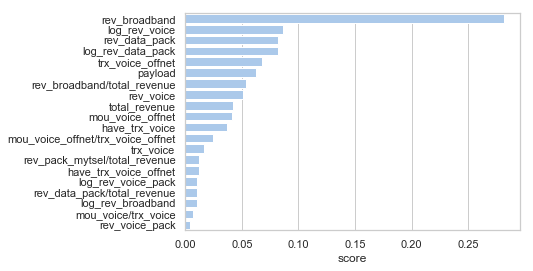

In [22]:
import seaborn as sns

keys = X.columns
values = abs(rf.feature_importances_)

importances = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)

# Top 20 features
importances = importances.head(20)

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

sns.barplot(y=importances.index, x=importances['score'],
            label="Feature Importance", color="b",)

In [62]:
import pickle

filename = 'random_forest.sav'
pickle.dump(rf, open(filename, 'wb'))

In [20]:
import pickle

filename = 'random_forest.sav'
rf = pickle.load(open(filename, 'rb'))

### XGBoost

In [64]:
best_params = {'max_depth': 5, 'gamma': '0.364', 'subsample': '0.60', 'reg_alpha': '0.353', 'reg_lambda': '0.187', 'learning_rate': '0.079', 'num_leaves': '110.000', 'colsample_bytree': '0.679', 'min_child_samples': '140.000', 'feature_fraction': '0.618', 'bagging_fraction': '0.834'}

In [65]:
import xgboost as xgb

n_estimators = 5
xgb = xgb.XGBClassifier(
            n_estimators=n_estimators, random_state=4, verbose=True,
            **best_params
        )
xgb.fit(X_train, y_train)

XGBClassifier(bagging_fraction='0.834', base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree='0.679',
              feature_fraction='0.618', gamma='0.364', learning_rate='0.079',
              max_delta_step=0, max_depth=5, min_child_samples='140.000',
              min_child_weight=1, missing=None, n_estimators=5, n_jobs=1,
              nthread=None, num_leaves='110.000', objective='binary:logistic',
              random_state=4, reg_alpha='0.353', reg_lambda='0.187',
              scale_pos_weight=1, seed=None, silent=None, subsample='0.60',
              verbose=True, verbosity=1)

In [66]:
import pickle

filename = 'xgb_model.sav'
pickle.dump(xgb, open(filename, 'wb'))

In [67]:
import pickle

filename = 'random_forest.sav'
xgb = pickle.load(open(filename, 'rb'))

### Dimensionality Reduction

#### PCA

### TODO: Perform clustering and identify each cluster characteristic

## Customer Subsegment using ARPU

# Evaluation

## Supervised Model

### Decision Tree

#### AUC Score

In [27]:
model = rf

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)
y_train_pred = model.predict(X_train)
y_train_pred_prob = model.predict_proba(X_train)

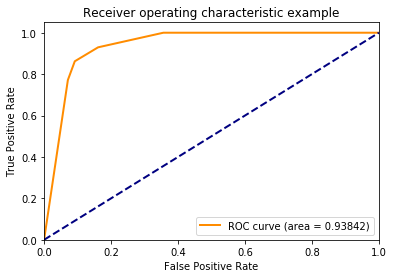

In [26]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

# Compute micro-average ROC curve and ROC area
# fpr, tpr, _ = roc_curve(y_test.ravel(), y_preds_prob.ravel())
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

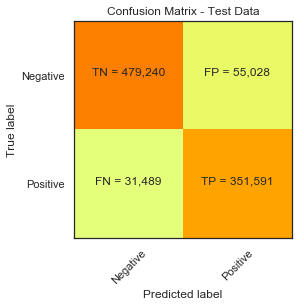

In [328]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.set_style("white")
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+' = '+'{0:,d}'.format(cm[i][j]),horizontalalignment='center')
plt.show()

In [329]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92    534268
           1       0.86      0.92      0.89    383080

    accuracy                           0.91    917348
   macro avg       0.90      0.91      0.90    917348
weighted avg       0.91      0.91      0.91    917348



#### Feature Importance

In [330]:
model = rf

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


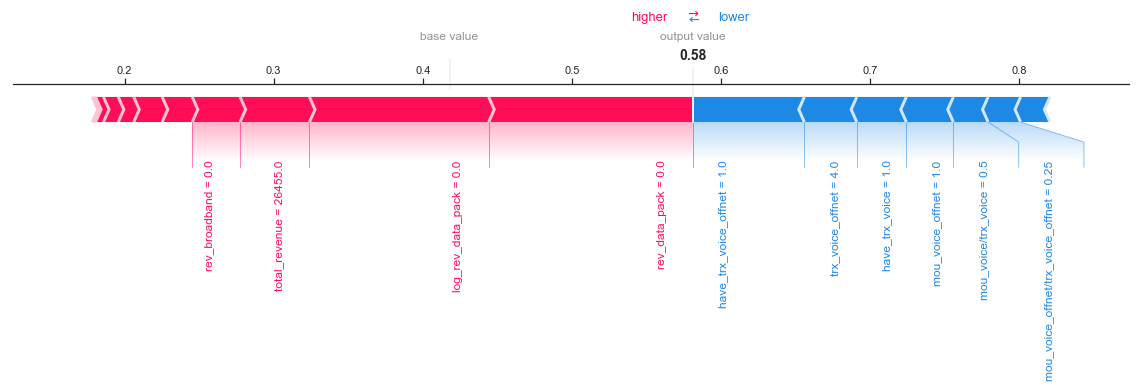

In [339]:
import shap

sample_proportion = 5000/X_test.shape[0]
mask = np.random.choice([False, True], len(X_test), p=[1-sample_proportion, sample_proportion])
X_sample = X_test[mask]

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_sample)

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_sample)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value[1], shap_values[1][1], X_sample.iloc[0,:],matplotlib=True,text_rotation=90)

In [342]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_sample,)

shap.force_plot is slow for many thousands of rows, try subsampling your data.


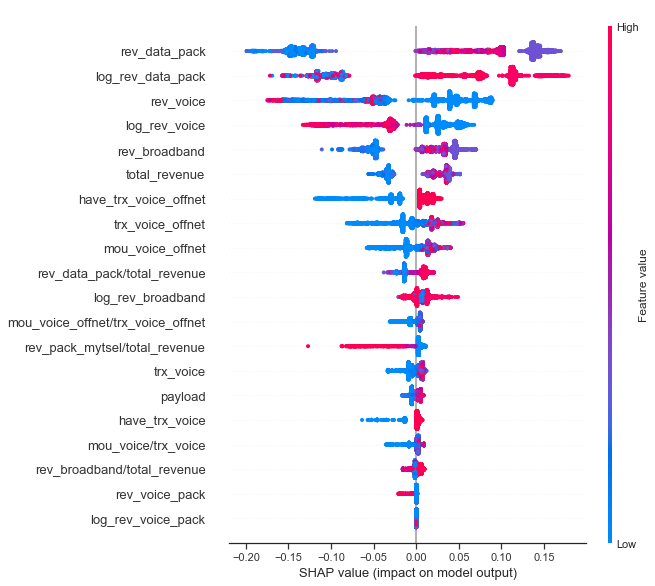

In [341]:
shap.summary_plot(shap_values[1], X_sample,plot_type='dot')

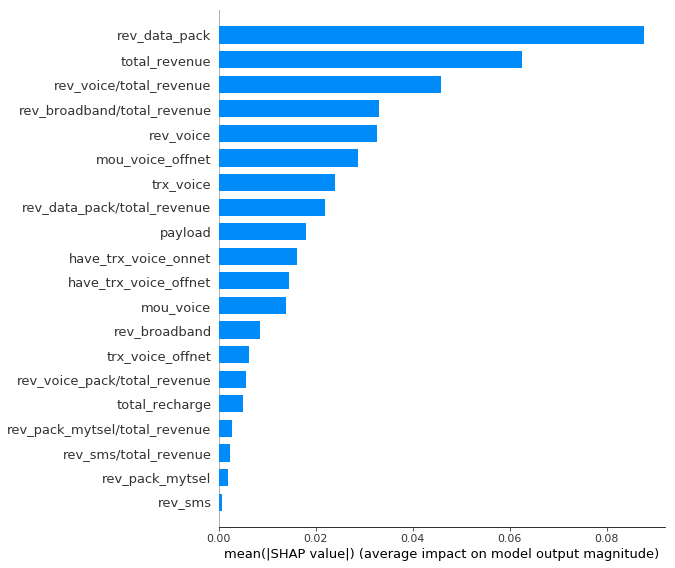

In [50]:
shap.summary_plot(shap_values[1], X_sample, plot_type="bar")

#### Feature Importance

In [79]:
importance_df = pd.DataFrame(columns=['feature','importance'])
for name, importance in zip(X.columns, model.feature_importances_):
    importance_df = pd.concat([importance_df,pd.DataFrame(data={'feature':[name],'importance':[importance]})])
importance_df = importance_df.sort_values(by='importance',ascending=False)
importance_df = importance_df.reset_index()

In [71]:
importance_df.loc[:30,'feature']

[i for i in importance_df.loc[:30,'feature']]

['rev_data_pack',
 'rev_broadband',
 'trx_voice_offnet',
 'rev_data_pack/total_revenue',
 'payload',
 'total_revenue',
 'rev_voice/total_revenue',
 'mou_voice_offnet',
 'have_trx_voice_offnet',
 'rev_voice',
 'trx_voice',
 'rev_broadband/total_revenue',
 'trx_voice_onnet',
 'have_trx_voice',
 'first_rank_category_MissingValue',
 'rev_pack_mytsel',
 'total_recharge',
 'mou_voice_offnet/trx_voice_offnet',
 'rev_pack_mytsel/total_revenue',
 'mytsel_app_user',
 'mou_voice',
 'mou_voice/trx_voice',
 'rev_voice_pack',
 'rev_sms',
 'have_trx_voice_onnet',
 'mou_voice_onnet',
 'rev_sms/total_revenue',
 'region_10.Balinusra',
 'los',
 'first_rank_category_News_Lifestyle',
 'region_12.Sulawesi']

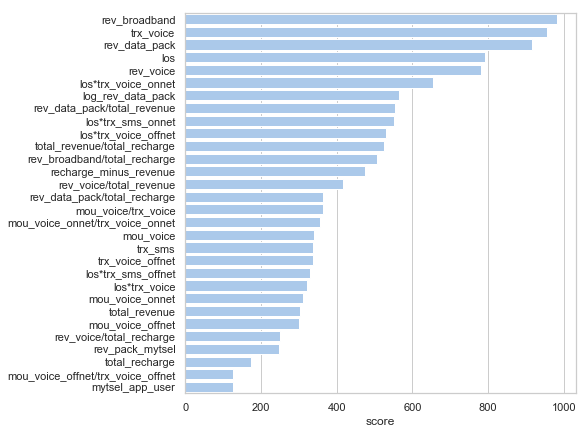

In [124]:
figsize=(7,7)
fig, ax = plt.subplots(figsize=figsize)

# Top 30 features
importances = importances.head(30)

sns.set(style="whitegrid")
sns.set_color_codes("pastel")

sns.barplot(y=importances.index, x=importances['score'],
            label="Feature Importance", color="b",)

## Customer Segmentation (Clustering)

In [106]:
X_all_col.shape

(1310497, 118)

In [115]:
supervised_learn_feature = ['rev_broadband', 'log_rev_voice', 'rev_data_pack',
       'log_rev_data_pack', 'trx_voice_offnet', 'payload',
       'rev_broadband/total_revenue', 'rev_voice', 'total_revenue',
       'mou_voice_offnet', 'have_trx_voice',
       'mou_voice_offnet/trx_voice_offnet', 'trx_voice',
       'rev_pack_mytsel/total_revenue', 'have_trx_voice_offnet',
       'log_rev_voice_pack', 'rev_data_pack/total_revenue',
       'log_rev_broadband', 'mou_voice/trx_voice', 'rev_voice_pack']

X = X_all_col[supervised_learn_feature]

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(max_depth=5,n_estimators=20,min_samples_leaf=100)
rf = rf.fit(X_train, y_train)
# log_reg = LogisticRegression().fit(X_train, y_train)

In [406]:
model = rf
# model = log_reg

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)
y_train_pred = model.predict(X_train)
y_train_pred_prob = model.predict_proba(X_train)

In [407]:
treshold = 0.7
model = rf
# model = log_reg

X_cluster = X.copy()

In [408]:
y_pred = model.predict(X)
y_pred_prob = model.predict_proba(X)[:, 1]
X_cluster = X_all_col[(y_pred_prob > treshold) & (y.T.squeeze()==0)]

In [411]:
X_cluster.shape

(57564, 118)

In [269]:
# from sklearn.feature_selection import VarianceThreshold

# selector = VarianceThreshold(threshold=0.1)
# selector.fit_transform(X_cluster)
# X_all_col.columns[selector.get_support()]

In [270]:
def iterative_drop():
    cluster_feature = ['los', 'mytsel_app_user', 'total_revenue',
           'rev_voice', 'rev_sms', 'rev_broadband', 'rev_voice_pack',
           'rev_sms_pack', 'rev_data_pack', 'rev_pack_mytsel', 'trx_voice',
           'trx_voice_onnet', 'trx_voice_offnet', 'mou_voice', 'mou_voice_onnet',
           'mou_voice_offnet', 'trx_sms', 'trx_sms_onnet', 'trx_sms_offnet','total_recharge_mytsel',
           'first_rank_category_Transportation', 'region_05.Central Jabotabek',
           'region_06.Eastern Jabotabek', 'mou_voice/trx_voice',
           'mou_voice_onnet/trx_voice_onnet', 'mou_voice_offnet/trx_voice_offnet',
           'have_trx_sms', 'have_trx_sms_onnet', 'have_trx_sms_offnet',
           'log_total_revenue', 'log_rev_voice', 'log_rev_sms',
           'log_rev_broadband', 'log_rev_voice_pack', 'log_rev_data_pack',
           'log_rev_pack_mytsel']

    for i in cluster_feature:
        X_cluster = X_all_col[(y_pred_prob > treshold) & (y.T.squeeze()==0)]
        X_cluster = X_cluster[cluster_feature]
        X_cluster = X_cluster.loc[:, X_cluster.columns != i]
        use_sample = True

        if use_sample == True:
            sample_proportion = 10000/X_cluster.shape[0]
            mask = np.random.choice([False, True], len(X_cluster), p=[1-sample_proportion, sample_proportion])
            X_sample = X_cluster[mask]
        else:
            X_sample = X_cluster


        clustering = KMeans(n_clusters=3, random_state=0).fit(X_sample)
        cluster = clustering.predict(X_sample)
        score = metrics.silhouette_score(X_sample, cluster)

        print('{} : {}'.format(i,score))

# iterative_drop()

In [448]:
cluster_feature = ['los', 'mytsel_app_user', 'total_revenue',
           'rev_voice', 'rev_sms', 'rev_broadband', 'rev_voice_pack',
           'rev_sms_pack', 'rev_data_pack', 'rev_pack_mytsel', 'trx_voice',
           'trx_voice_onnet', 'trx_voice_offnet', 'mou_voice', 'mou_voice_onnet',
           'mou_voice_offnet', 'trx_sms', 'trx_sms_onnet', 'trx_sms_offnet','total_recharge_mytsel',
           'first_rank_category_Transportation', 'region_05.Central Jabotabek',
           'region_06.Eastern Jabotabek', 'mou_voice/trx_voice',
           'mou_voice_onnet/trx_voice_onnet', 'mou_voice_offnet/trx_voice_offnet',
           'have_trx_sms', 'have_trx_sms_onnet', 'have_trx_sms_offnet',
           'log_total_revenue', 'log_rev_voice', 'log_rev_sms',
           'log_rev_broadband', 'log_rev_voice_pack', 'log_rev_data_pack',
           'log_rev_pack_mytsel']

In [472]:
X_cluster = X_cluster[cluster_feature]

In [473]:
X_cluster.shape

(57564, 36)

In [280]:
use_sample = False

In [346]:
import timeit
from sklearn.cluster import KMeans
from sklearn import metrics

start = timeit.default_timer()

if use_sample == True:
    sample_proportion = 10000/X_cluster.shape[0]
    mask = np.random.choice([False, True], len(X_cluster), p=[1-sample_proportion, sample_proportion])
    X_sample = X_cluster[mask]
else:
    X_sample = X_cluster


clustering = KMeans(n_clusters=3, random_state=0).fit(X_sample)
cluster = clustering.predict(X_sample)
score = metrics.silhouette_score(X_sample, cluster)

stop = timeit.default_timer()

print('Time: ', stop - start) 

print(score)

Time:  124.6951939999999
0.7368396644708858


In [347]:
from sklearn.cluster import KMeans
from sklearn import metrics

if use_sample == True:
    X_sample =  X_cluster[(y_pred_prob > treshold) & (y.T.squeeze()==0)]
#     sample_proportion = X_sample.shape[0]/X_cluster.shape[0]
    sample_proportion = 10000/X_sample.shape[0]
    mask = np.random.choice([False, True], len(X_cluster), p=[1-sample_proportion, sample_proportion])
    X_sample = X_sample[mask]
else:
    X_sample = X_cluster
    
silhouette_score = pd.DataFrame(columns=['num_of_cluster','silhouette_score'])

for i in range(2,11):
    model = KMeans(n_clusters=i, random_state=0).fit(X_sample)
    cluster = model.predict(X_sample)
    score = metrics.silhouette_score(X_sample, cluster)
    silhouette_score = silhouette_score.append(pd.DataFrame({'num_of_cluster':[i],'silhouette_score':[score]}))
silhouette_score = silhouette_score.reset_index(drop=True)

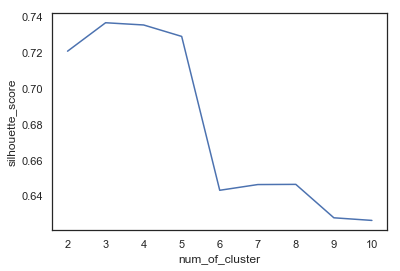

In [348]:
# plt.ylim(0, 1)
ax = sns.lineplot(x='num_of_cluster',y='silhouette_score',data=silhouette_score,)

In [349]:
silhouette_score

num_of_cluster  silhouette_score
0              2          0.720932
1              3          0.736840
2              4          0.735592
3              5          0.729199
4              6          0.643192
5              7          0.646394
6              8          0.646499
7              9          0.627815
8             10          0.626350

In [388]:
X_cluster.shape

(57564, 36)

In [389]:
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.metrics import silhouette_score

kmean = KMeans(n_clusters=3, random_state=0).fit(X_cluster)

In [390]:
cluster = kmean.predict(X_cluster)

In [391]:
pd.DataFrame(cluster, columns=['cluster'])\
['cluster'].value_counts()

0    39499
1    14673
2     3392
Name: cluster, dtype: int64

In [392]:
unique, counts = np.unique(cluster, return_counts=True)
dict(zip(unique, counts))

{0: 39499, 1: 14673, 2: 3392}

In [393]:
import pickle

filename = 'kmean.sav'
pickle.dump(kmean, open(filename, 'wb'))

In [394]:
import pickle

filename = 'kmean.sav'
kmean = pickle.load(open(filename, 'rb'))

In [504]:
cluster = kmean.predict(X_cluster)

In [505]:
cluster = pd.DataFrame(cluster,columns=['cluster'])

In [506]:
X_cluster.to_csv('x_cluster.csv',index=False)
cluster.to_csv('cluster.csv',index=False)
X_cluster_full.to_csv('x_cluster_full.csv', index=False)

In [4]:
X_cluster = pd.read_csv('x_cluster.csv')
cluster = pd.read_csv('cluster.csv')
X_cluster_full = pd.read_csv('x_cluster_full.csv')

In [508]:
X_cluster_full = X_all_col[(y_pred_prob > treshold) & (y.T.squeeze()==0)]

In [509]:
X_cluster_full = X_cluster_full.reset_index(drop=True)

In [575]:
X_cluster_full[(np.array(cluster['cluster']==0)) & (X_cluster_full['total_revenue']<100000)].describe()

los  total_recharge  mytsel_app_user  total_revenue  \
count  32096.000000    3.209600e+04     32096.000000   32096.000000   
mean    1317.670644    7.802483e+04         0.476072   80077.907403   
std     1532.194434    3.144705e+04         0.499435    6779.969988   
min        0.000000    0.000000e+00         0.000000   75000.000000   
25%      458.000000    7.500000e+04         0.000000   75000.000000   
50%      810.000000    7.500000e+04         0.000000   76517.500000   
75%     1600.000000    8.500000e+04         1.000000   83432.250000   
max     8985.000000    3.075000e+06         1.000000   99999.000000   

          rev_voice       rev_sms  rev_broadband  rev_voice_pack  \
count  32096.000000  32096.000000   32096.000000    32096.000000   
mean     840.735917    299.740186   76891.552405      213.611603   
std     3035.931348    992.137120    4449.506608     1524.092171   
min        0.000000      0.000000   75000.000000        0.000000   
25%        0.000000      0.000000   75000.000000        0.000000   
50%        0.000000      0.000000   75000.000000        0.000000   
75%        0.000000    165.000000   75569.000000        0.000000   
max    24963.000000  23000.000000   99998.000000    23750.000000   

       rev_sms_pack  rev_data_pack  ...  \
count  32096.000000   32096.000000  ...   
mean       2.594093   75610.291095  ...   
std      177.162082    2943.169845  ...   
min        0.000000   75000.000000  ...   
25%        0.000000   75000.000000  ...   
50%        0.000000   75000.000000  ...   
75%        0.000000   75000.000000  ...   
max    19500.000000   99010.000000  ...   

       rev_data_pack between 5000000 and 10000000  \
count                                     32096.0   
mean                                          0.0   
std                                           0.0   
min                                           0.0   
25%                                           0.0   
50%                                           0.0   
75%                                           0.0   
max                                           0.0   

       rev_data_pack between 10000000 and 15000000  \
count                                      32096.0   
mean                                           0.0   
std                                            0.0   
min                                            0.0   
25%                                            0.0   
50%                                            0.0   
75%                                            0.0   
max                                            0.0   

       rev_pack_mytsel between 0 and 250000  \
count                               32096.0   
mean                                    1.0   
std                                     0.0   
min                                     1.0   
25%                                     1.0   
50%                                     1.0   
75%                                     1.0   
max                                     1.0   

       rev_pack_mytsel between 250000 and 500000  \
count                                    32096.0   
mean                                         0.0   
std                                          0.0   
min                                          0.0   
25%                                          0.0   
50%                                          0.0   
75%                                          0.0   
max                                          0.0   

       rev_pack_mytsel between 500000 and 1000000  \
count                                     32096.0   
mean                                          0.0   
std                                           0.0   
min                                           0.0   
25%                                           0.0   
50%                                           0.0   
75%                                           0.0   
max                                           0.0   

       rev_pack_mytsel between 1000000 

In [7]:
writer = pd.ExcelWriter('cluster.xlsx')
for i in np.unique(cluster):
    data = X_cluster_full[np.array(cluster['cluster']==i)].describe()
    data.to_excel(writer,'Cluster {}'.format(i))
    sub1 = X_cluster_full[(np.array(cluster['cluster']==i)) & (X_cluster_full['total_revenue'] < 150000)].describe()
    sub1.to_excel(writer,'Cluster {} sub-cluster 1'.format(i))
    sub2 = X_cluster_full[(np.array(cluster['cluster']==i)) & (X_cluster_full['total_revenue']>=150000)\
                         & (X_cluster_full['total_revenue']<250000)].describe()
    sub2.to_excel(writer,'Cluster {} sub-cluster 2'.format(i))
    sub3 = X_cluster_full[(np.array(cluster['cluster']==i)) & (X_cluster_full['total_revenue']>=250000)].describe()
    sub3.to_excel(writer,'Cluster {} sub-cluster 3'.format(i))
writer.save()

In [511]:
cluster = pd.DataFrame(cluster,columns=['cluster'])['cluster']

### Plot Cluster

In [512]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [513]:
X_cluster_full = X_cluster_full.reset_index(drop=True)

In [514]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
sample_decomp = pca.fit_transform(X=X_cluster)
# sample_decomp = pca.fit_transform(X=X_cluster_full)

In [515]:
df_decomp = pd.DataFrame(sample_decomp,columns=['var0','var1','var2','var3'])
df_decomp = pd.concat([df_decomp,pd.DataFrame(cluster,columns=['cluster'])],axis=1)

In [517]:
cluster = cluster.copy()

Text(0.5, 0, 'var2')

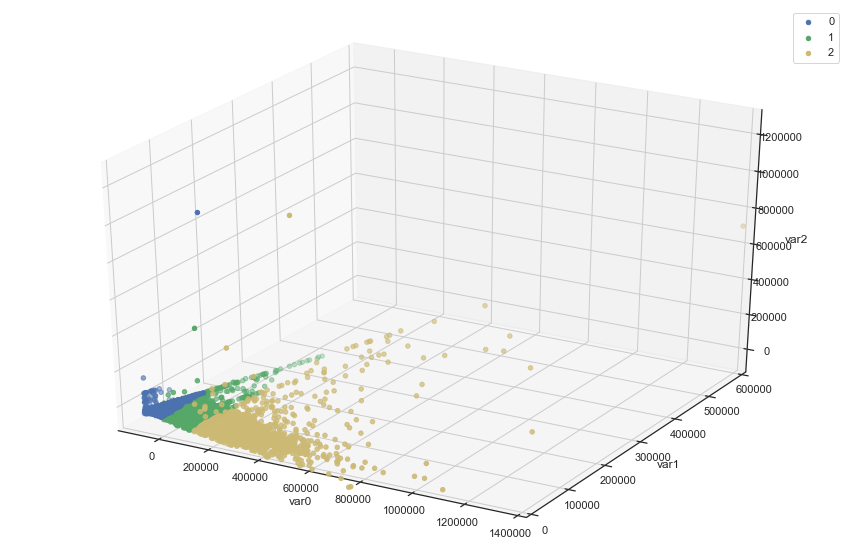

In [537]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.set_ylim([0,600000])

var0 = df_decomp['var0']
var1 = df_decomp['var1']
var2 = df_decomp['var2']
var3 = df_decomp['var3']

ax.scatter(var0[cluster==0], var2[cluster==0], var3[cluster==0],c='b',zdir='z',s=20)
ax.scatter(var0[cluster==1], var2[cluster==1], var3[cluster==1],c='g',zdir='z',s=20)
ax.scatter(var0[cluster==2], var2[cluster==2], var3[cluster==2],c='y',zdir='z',s=20)
ax.legend('012')

ax.set_xlabel('var0')
ax.set_ylabel('var1')
ax.set_zlabel('var2')

# ax.view_init(30,40)

Text(0.5, 0, 'var3')

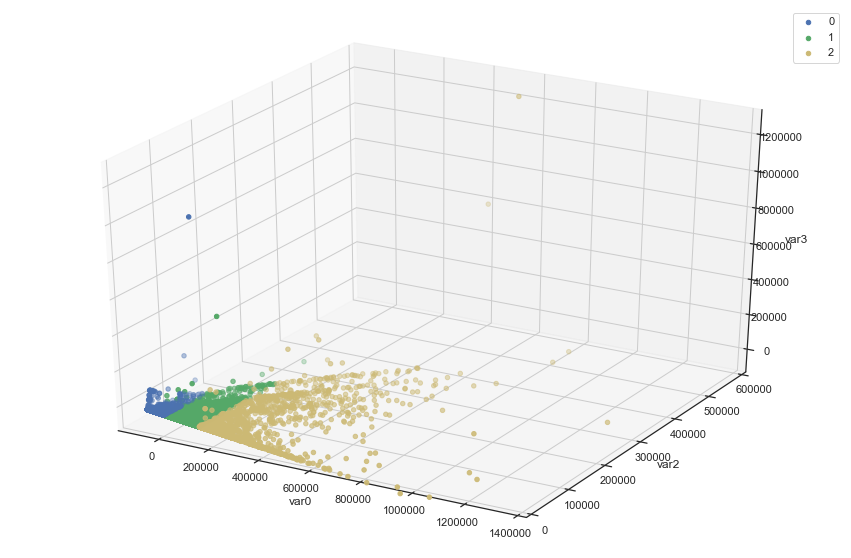

In [543]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
ax.set_ylim([0,600000])

var0 = df_decomp['var0']
var1 = df_decomp['var1']
var2 = df_decomp['var2']
var3 = df_decomp['var3']

ax.scatter(var0[cluster==0], var1[cluster==0], var3[cluster==0],c='b',zdir='z',s=20)
ax.scatter(var0[cluster==1], var1[cluster==1], var3[cluster==1],c='g',zdir='z',s=20)
ax.scatter(var0[cluster==2], var1[cluster==2], var3[cluster==2],c='y',zdir='z',s=20)
ax.legend('012')

ax.set_xlabel('var0')
ax.set_ylabel('var2')
ax.set_zlabel('var3')

# ax.view_init(70, 30)